# Lab02: Modiyfing Barabasi-Albert

### Check List for Lab02 ###
- [ ] File is submitted with correct filename. *lastname\_firstname\_cs499\_lab02.ipynb* .**(5 pts)**
- [ ] All cells run without runtime errors. **(10 pts)**
- [ ] Each section of code has comments. As a rule of thumb, I would add 1 comment for every 3 lines on average. To be extra safe and thorough, consider one comment per line of code. **(10 pts)**
- [ ] Correct implementation of barabasi_albert_modified(n, m, args\*\*) that only uses G(), nodes(), edges(), add_node(), add_edge(), add_nodes_from(), and add_edges_from() from NetworkX. I am open to other helper functions being used, but please run them by me via email or Slack first. By "correct," I mean that it is implemented consistently with your description and it is indeed a modification of Barabasi-Albert. **(25 pts)**
- [ ] Explanation of modification of barabasi_albert that includes a description of how your modified version deviates from the standard version. **(10 pts)**
- [ ] Quantitative comparison between Barabasi-Albert and the modified Barabasi-Albert that includes:
    - [ ] log-log graphs of degree distribution with correct, legible labels and legend **(5 pts)**
    - [ ] identification of powerlaw exponent (alpha) for each graph **(5 pts)**
    - [ ] CDF graphs of local clustering coefficients with correct, legible labels and legend **(5 pts)**
    - [ ] graph that plots target k in the x-axis and average distance from any node to nodes with the target k in the y-axis (see Box 4.4 in the text for this class) **(5 pts)**
    - [ ] graph that plots average distance between nodes on the y-axis against N in the x-axis, where N should be measured at N=100, N=1,000, N=10,000, and N=100,000. If your computer can handle it, you can run this with greater values of N as well. See Image 4.12 in your text. **(5 pts)**
- [ ] Summary of comparison between Barabasi-Albert and the modified Barabasi-Albert graphs. This discussion should refer to the quantitative comparisons you made in the previous step. **(15 pts)**

## Part 1: Modifying the Barabasi-Albert Model

As discussed in your book and in class, the Barabasi-Albert is left somewhat open-ended with respect to how the network is actually built. In addition, we also discussed possible modifications to the model that extend the existing components of growth and preferrential attachment. 

In the cell below, use 2-3 paragaphs to describe how you have modified the Barabasi-Albert model with barabasi_albert_modified(). Be sure to include a description of how the model still maintains elements of growth and preferrential attachment. 

TODO: Describe modifications to Barabasi-Albert model as implemented in barabasi_albert_modified().

Implement your modified Barabasi-Albert model in the cell below. Note that you **may only use G(), nodes(), edges(), add_node(), add_edge(), add_nodes_from(), and add_edges_from() from NetworkX.** However, feel free to use functions from other libraries, such as scipy, numpy, math, etc. 

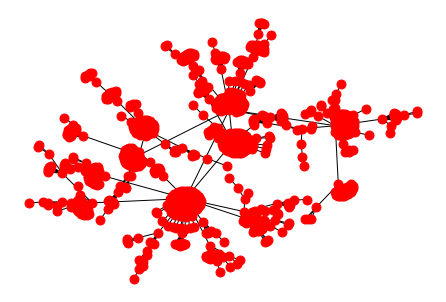

In [128]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy 
import random

# barabasi_albert_modified(nodesToAdd, targetEdgeCount):
#  Inputs:
#      nodesToAdd, number of nodes in the final network, should not be lower than 3
#      targetEdgeCount, number of nodes that a new node should attach to. CANNOT EXCEED 3 ON THIS IMPLEMENTATION
#      args**, other optional arguments that may be necessary for your implementation. DEFINE THESE HERE.
#
#  Outputs:
#      G, a NetworkX graph object that represents a network generated by your modified Barabasi-Albert model. 
def barabasi_albert_modified(nodesToAdd, targetEdgeCount):
    
    #Create a graph to be manipulated 
    G = nx.Graph()
    
    #Add a few initial nodes to the graph (Adds 3 initial nodes)
    #If taretEdgeCount is higher than 3, must add additional initial nodes 
    G.add_node(1)
    G.add_node(2)
    G.add_node(3)
    
    #Add a few initial edges to the graph
    G.add_edge(1,2)
    G.add_edge(2,3)
    G.add_edge(1,3)
    
    #Add to nodeList
    nodeList = [1,2,3]
    
    #decrement targetNodes
    nodesToAdd = nodesToAdd - 3
    
    #   add a node iterator for keeping track of next node
    currNode = 4
    
    #   add nodes one at a time
    for i in range (0,nodesToAdd):
        
        #   to add proper number of edges, set to var submitted
        edgesToAdd = targetEdgeCount
        
        #   add node
        G.add_node(currNode)
        
        while ( edgesToAdd > 0 ):
            
            #   Create random generator control list. 
            #   As it iterates through list, add list node to randList
            #   This means with 4 initial nodes, the first node is added
            #   ...and probability of being chosen is 20% (1 in 5)
            #   Then iterate to second node, probability is 16.6% (1 in 6)
            #   Third is 14% and so on..
            #   This causes preferential attachment towards the oldest nodes
            #   By adding more numbers to the randList and the rand selector below
            #   We can decrease the probability of the first node being selected, 
            #   Forcing it to cycle to later nodes, but with higher attachment rates
            #   on the older nodes still.  Future iterations could include a non-linear
            #   preferential attachment by altering the random selection algorithm
            randList = [-6,-5,-4,-3,-2,-1,0]
            
            #   Since we want to add a node now, loop through all nodes currently in G
            for node in nodeList:
                
                #   Append the current node to the rand list,
                #   so that as we iterate through the list, our probability decreases
                randList.append(node)
                #   Generate random number between current node and smallest value of randList
                rand = random.randint(-6,node)
                
                #   If rand matches the current node, add an edge to the currentNode
                if rand == node:
                    
                    #add edge and decrement edgesToAdd, break to go back to beginning of while
                    G.add_edge(currNode, node)
                    edgesToAdd = edgesToAdd - 1
                    break
                    
        #append node to node list
        nodeList.append(currNode)
        
        #iterate current node by 1
        currNode = currNode + 1
    
    return G

Graph = barabasi_albert_modified(1000, 1)

#  SHOW THE GRAPH CAUSE IT'S BEAUTIFUL AND WANTS TO BE SHOWN
plt.figure(1)
nx.draw(Graph, with_labels=False, node_size=80, font_weight='bold')
plt.show()

## Part 2: Comparison Between Barabasi-Albert and Modified Barabasi-Albert ##

In the cell below, compare the generated graphs below using CDF graphs of degree distribution, powerlaw exponents, and CDF graphs of local clustering coefficients, and CDF graphs of all pairs shortest path lengths. 

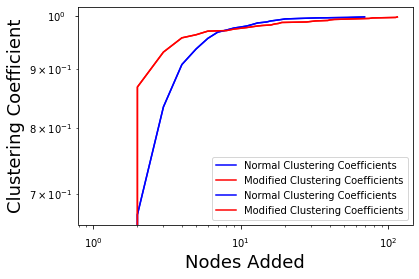

In [105]:
import networkx as nx
import powerlaw

#Set up graph formats
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")


# Set up Barabasi-Albert and modified Barabasi-Albert graphs. use N=1000 and m = 1 (or m = 2,3)
normalGraph = nx.barabasi_albert_graph(1000, 1, seed=None)
modifiedGraph = barabasi_albert_modified(1000, 1)

#degree of graph
normDeg = normalGraph.degree()
modifiedDeg = modifiedGraph.degree()

normData = [y for x,y in normDeg]
modifiedDeg = [y for x,y in modifiedDeg]



# log-log graphs of degree distribution with correct, legible labels and legend (5 pts)
powerlaw.plot_cdf(normData, color = 'b', label = "Normal Degree Distribution")
powerlaw.plot_cdf(modifiedDeg, color = 'r', label = "Modified Degree Distribution")
plt.xlabel('Nodes', fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.legend()

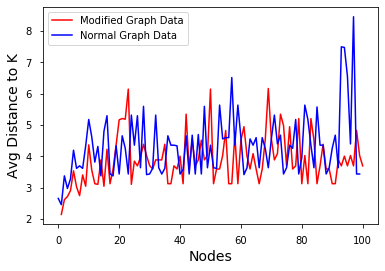

In [109]:
# graph that plots target k in the x-axis and average distance from any node to nodes with the target k in the y-axis (see Box 4.4 in the text for this class) (5 pts)
shortest_path_normal = []
shortest_path_modified = []
totalDistanceNorm = 0
totalDistanceMod = 0

# Set up Barabasi-Albert and modified Barabasi-Albert graphs. use N=1000 and m = 1 (or m = 2,3)
normalGraph = nx.barabasi_albert_graph(1000, 1, seed=None)
modifiedGraph = barabasi_albert_modified(1000, 1)

#degree of graph
num_normal_nodes = normalGraph.number_of_nodes()
num_modified_nodes = modifiedGraph.number_of_nodes()

for k in normalGraph:
    totalDistanceNorm = 0
    
    for node in normalGraph:
        totalDistanceNorm += nx.shortest_path_length(normalGraph, source=node, target=k, weight=None)
        
    totalDistanceNorm = totalDistanceNorm / num_normal_nodes
    
    shortest_path_normal.append(totalDistanceNorm)
    
for k in modifiedGraph:
    totalDistanceMod = 0
    
    for node in modifiedGraph:
        totalDistanceMod += nx.shortest_path_length(modifiedGraph, source=node, target=k, weight=None)
        
    totalDistanceMod = totalDistanceMod / num_modified_nodes
    
    shortest_path_modified.append(totalDistanceMod)
    
    
plt.plot(modifiedGraph.nodes() , shortest_path_modified, color = 'r', label = 'Modified Graph Data')
plt.plot(normalGraph.nodes() , shortest_path_normal, color = 'b', label = 'Normal Graph Data')
plt.xlabel('Nodes', fontsize=14)
plt.ylabel('Avg Distance to K', fontsize=14)
plt.legend()

In [113]:
# identification of powerlaw exponent (alpha) for each graph (5 pts)
import powerlaw
fitNormal = powerlaw.Fit(normalGraph)
fitModified = powerlaw.Fit(modifiedGraph)
fitNormal.power_law.alpha
fitModified.power_law.alpha
print(fitNormal.power_law.alpha)
print(fitModified.power_law.alpha)


9.083271777305292
9.17882479121541


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


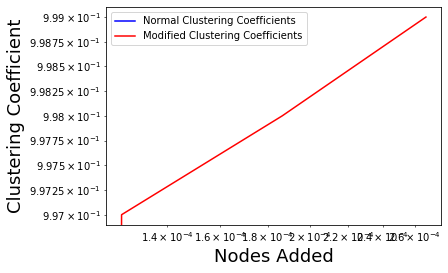

In [126]:
# CDF graphs of local clustering coefficients with correct, legible labels and legend (5 pts)

# Set up Barabasi-Albert and modified Barabasi-Albert graphs. use N=1000 and m = 1 (or m = 2,3)
normalGraph = nx.barabasi_albert_graph(1000, 1, seed=None)
modifiedGraph = barabasi_albert_modified(1000, 1)

clustering_normal = []
clustering_modified = []

for node in normalGraph:
    clustering_normal.append(nx.clustering(normalGraph,node))
    
for node in modifiedGraph:
  clustering_modified.append(nx.clustering(modifiedGraph,node))

powerlaw.plot_cdf(clustering_normal, color = 'b', label = "Normal Clustering Coefficients")
powerlaw.plot_cdf(clustering_modified, color = 'r', label = "Modified Clustering Coefficients")
plt.xlabel('Node', fontsize=18)
plt.ylabel('Clustering Coefficient', fontsize=18)
plt.legend()

In [ ]:
#graph that plots average distance between nodes on the y-axis against N in the x-axis, where N should be measured at N=100, N=1,000, N=10,000, and N=100,000. If your computer can handle it, you can run this with greater values of N as well. See Image 4.12 in your text. (5 pts)
# graph that plots target k in the x-axis and average distance from any node to nodes with the target k in the y-axis (see Box 4.4 in the text for this class) (5 pts)
shortest_path_normal = []
shortest_path_modified = []
totalDistanceNorm = 0
totalDistanceMod = 0

#    TEST WITH 1000, 10000, 100000
# Set up Barabasi-Albert and modified Barabasi-Albert graphs. use N=1000 and m = 1 (or m = 2,3)
normalGraph = nx.barabasi_albert_graph(1000, 1, seed=None)
modifiedGraph = barabasi_albert_modified(1000, 1)

#degree of graph
num_normal_nodes = normalGraph.number_of_nodes()
num_modified_nodes = modifiedGraph.number_of_nodes()

for k in normalGraph:
    totalDistanceNorm = 0
    
    for node in normalGraph:
        totalDistanceNorm += nx.shortest_path_length(normalGraph, source=node, target=k, weight=None)
        
    totalDistanceNorm = totalDistanceNorm / num_normal_nodes
    
    shortest_path_normal.append(totalDistanceNorm)
    
for k in modifiedGraph:
    totalDistanceMod = 0
    
    for node in modifiedGraph:
        totalDistanceMod += nx.shortest_path_length(modifiedGraph, source=node, target=k, weight=None)
        
    totalDistanceMod = totalDistanceMod / num_modified_nodes
    
    shortest_path_modified.append(totalDistanceMod)
    
    
plt.plot(modifiedGraph.nodes() , shortest_path_modified, color = 'r', label = 'Modified Graph Data')
plt.plot(normalGraph.nodes() , shortest_path_normal, color = 'b', label = 'Normal Graph Data')
plt.xlabel('Nodes', fontsize=14)
plt.ylabel('Avg Distance', fontsize=14)
plt.legend()


### Summary of Comparison ###

In the cell below, write 2-3 paragaphs summarizing the comparison between your model and the original Barabasi-Albert model.

In this algorithm, I have made a version of Barabasi-Albert by creating a network with preferential attachment and growth.  These were accomplished through a random number generator, which begins with a small array of numbers, adding an edge to a node if it 'rolls' on a specific node- however, the array gets incrementally bigger as it loops through nodes in the graph, simultaneously adding to the random number generator array, thus creating a lower probability of attachment to newer nodes in the graph, and a preferred attachment to older nodes.  This creates very interesting hubs on older nodes which are clearly obvious when testing with m = 1, but as more edges are added, although clustering is still present, it's not as visible.  Because the graph is hard-coded to add a couple nodes, the tree-like structure almost stems from the center and moves outwards when each node is only added by one edge.

Growth is accomodated by allowing for an infinite number of nodes to be added to the graph, and in fact as the graph gets bigger, the preferential attachment algorithm still works perfectly.  Having an increased probability of attaching to the initial nodes in the graph, but still introducing a random element to the system is a clever and elegant solution to creating these hubs, as the structure will be largely predictable, but every once in a while a new hub will be formed randomly as the network grows.  I feel as though having these hubs spontaneously pop up and branch out of larger hubs may be an excellent way of predicting real networks.